In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('probability.png',0)

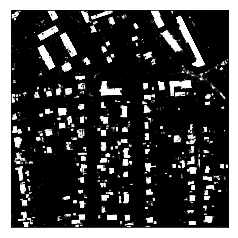

In [3]:
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

##### 1. бинаризуем и порог

In [4]:
ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)

119.0


In [5]:
#plt.imshow(thresh, 'gray')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#plt.show()

###### 2. ищем связные компоненты и пытаемся выкинуть маленькие отсюда. Просто перерисовываем новую картинку с только прошедшими проверку штуками

In [6]:
#find all your connected components 
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)
#connectedComponentswithStats yields every seperated component with information on each of them, such as size
#the following part is just taking out the background which is also considered a component, but most of the time we don't want that.
sizes = stats[1:, -1]; nb_components = nb_components - 1
print(sizes.mean())

# minimum size of particles we want to keep (number of pixels)
#here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever
min_size = 1.5*sizes.mean() 

#your answer image
cleared = np.zeros((output.shape))
#for every component in the image, you keep it only if it's above min_size
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        cleared[output == i + 1] = 255

        
cv2.imwrite('cleared.png', cleared)

3316.990493713585


True

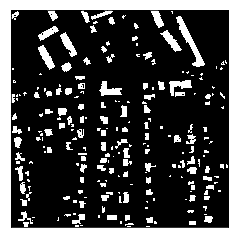

In [7]:
plt.imshow(cleared, 'gray')
plt.xticks([]), plt.yticks([])  
plt.show()

#### 3. finding contours

In [8]:
img_c = cv2.imread('cleared.png',0)

In [9]:
#plt.imshow(img_c, cmap = 'gray')
#plt.xticks([]), plt.yticks([])  
#plt.show()

In [10]:
ret2,thresh2 = cv2.threshold(img_c,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret2)

0.0


In [11]:
e_img, contours, hierarchy = cv2.findContours(thresh2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

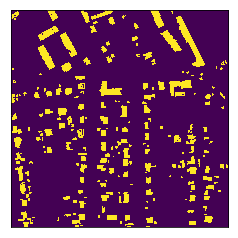

In [12]:
img_contours= cv2.drawContours(img, contours, -1, (192,0,0), 30)
#img_contours=cv2.DrawContours(image=e_img, contour=contours, contourIdx = -1, color = (255, 0, 0))
plt.imshow(e_img)
plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
len(contours)

238

##### 4. approx coordinates of counturs

In [14]:
approx_coordinates = []
for i in range(0, len(contours)):
#    print('step ', i)
    cnt = contours[i]  #взяли конкретный контур
#    print(cnt)
    perimeter = cv2.arcLength(cnt,True)
#    print('prime perimeter is ', perimeter)
    epsilon = 0.3*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    perimeter = cv2.arcLength(approx, True)
#    print('approx perimetr is ', perimeter)
#    print('approx coordinates are', approx)
    approx_coordinates.append(approx)

In [15]:
houses = []

###### 5. что-то пытаемся отрисовать

In [16]:
for i in range(0, len(contours)):
    cnt = contours[i]
    #Максимальный прямоугольник содержащий контур 
    x,y,w,h= cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(100,0,32),5)
    #добавляем центр этого прямоугольника в конец списка
    houses.append((x+w/2,y+h/2))

In [ ]:
imgg= cv2.drawContours(img, contours, -1, (192,0,0), 30)

In [ ]:
plt.imshow(imgg)
plt.show()

In [17]:
houses

[(5792.0, 9191.0),
 (4977.0, 9190.5),
 (2799.0, 9163.0),
 (862.0, 9059.0),
 (4998.5, 9077.5),
 (634.0, 9101.0),
 (6086.5, 9029.5),
 (4648.5, 9016.5),
 (7655.0, 9043.5),
 (858.5, 8952.5),
 (771.0, 8873.0),
 (5847.0, 8910.5),
 (964.5, 8819.5),
 (1999.5, 8858.0),
 (8329.0, 8901.0),
 (3734.5, 8789.5),
 (4919.5, 8820.0),
 (4275.0, 8813.0),
 (2848.0, 8921.5),
 (2388.0, 8725.5),
 (8216.5, 8675.5),
 (2690.5, 8680.0),
 (489.5, 8759.5),
 (7587.0, 8577.0),
 (5725.5, 8414.5),
 (3900.0, 8472.5),
 (8200.5, 8413.0),
 (5770.5, 8157.5),
 (3021.0, 8261.5),
 (2708.0, 8153.0),
 (4620.5, 8150.5),
 (574.5, 8212.5),
 (7397.0, 8053.0),
 (439.5, 8047.5),
 (766.5, 8053.0),
 (6034.0, 8053.0),
 (2342.5, 7987.5),
 (4604.5, 7986.0),
 (8288.0, 7988.0),
 (7673.5, 8010.5),
 (3161.0, 7929.5),
 (3983.5, 7972.5),
 (704.5, 7911.5),
 (4861.0, 7978.0),
 (820.5, 7769.0),
 (4169.5, 7796.5),
 (4581.5, 7771.0),
 (7603.5, 7729.0),
 (8249.5, 7769.5),
 (2937.0, 7725.5),
 (8830.0, 7691.0),
 (5870.0, 7728.5),
 (781.5, 7576.5),
 (842

In [18]:
len(houses)

238